In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dealing with outliers

išskirtis turėtų būti iki 5% visų duomenų. Jeigu daugiau, tai jau nebe išskirtis.
Nustatyti išskirtis galima būdais:
* klausti tų duomenų ekspertų, kas yra išskirtis
* jeigu normaliai pasiskirstę (arba transformuoti į norm.) tai pagal std. nuokrypį |zi| > 3 (>2)
* pagal IQR
* žiūrėti kurie taškai neseka bendros duomenų tendencijos (tarp labiausiai koreliuotų)

In [2]:
# Choose a mean,standard deviation, and number of samples

def create_ages(mu=50,sigma=13,num_samples=100,seed=42):
    np.random.seed(seed)

    #create random standart normal distribution of sample ages
    sample_ages = np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_ages = np.round(sample_ages,decimals=0) # round, so there are no decimals
    
    return sample_ages # return integers

In [3]:
sample = create_ages()
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

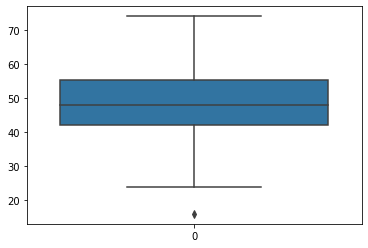

In [5]:
sns.boxplot(data=sample) # boxplot has a mathematical way of showing outliers using IQR
plt.show()

In [6]:
ser = pd.Series(sample)
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [7]:
q75, q25 = np.percentile(sample, [75,25])
IQR = 55.25 - 42.0 #75% percentile - 25% percentile
lower_limit = 42.0 - 1.5*IQR
lower_limit # this is how boxplot found that outlier, everything below this is an outlier

22.125

In [8]:
len(ser[ser > lower_limit]) # get rid of that one outlier

99

In [9]:
df = pd.read_csv('inp_files/Ames_Housing_Data.csv')
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [10]:
# main goal is to predict the final column (SalePrice) from all other features
# namo pardavimo kaina yra mūsų klasė. Galim pažiūrėt koreliacijas visų stulpeliu su kainos 
# ir pažiūret kurie labiausiai susiję
df.corr()['SalePrice'].sort_values()
# radom, kad 'Overall Qual' stulpelis labiausiai koreliuojasi, namo apibendrinta kokybė.

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

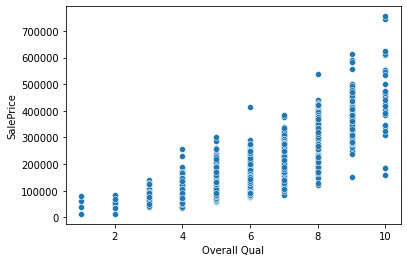

In [13]:
sns.scatterplot(data=df, x='Overall Qual', y='SalePrice')
plt.show() # let's plot some of the most correlated and see if we find some outliers

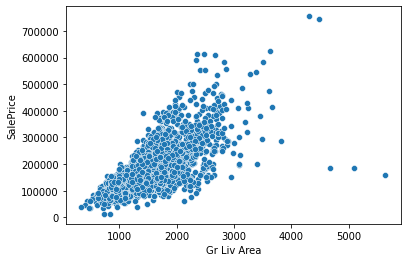

In [14]:
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice')
plt.show() # we can see that both features show outliers, are they the same?

In [16]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)] # auktšta kokybė, bet žema kaina,
# neseka trajektorijos kaip kiti duomenys, tai tikrai išskirtys

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [17]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)] # these 3 points are the same in both features

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


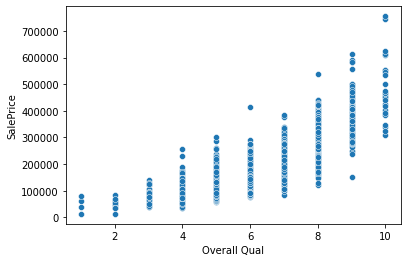

In [19]:
outlier_index = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index
df = df.drop(outlier_index, axis=0) # let's remove the 3 outlier houses

sns.scatterplot(data=df, x='Overall Qual', y='SalePrice')d
plt.show()

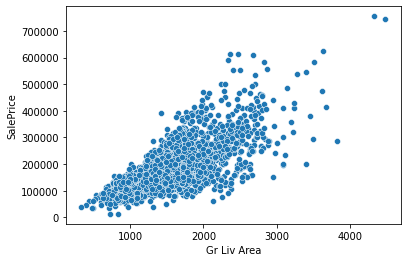

In [20]:
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice')
plt.show() # nebėra tų 3 namų

In [21]:
df.to_csv('inp_files/Ames_outliers_removed.csv')

# Dealing with missing data

* palikti
* išmesti
* pakeisti kita reikšme

In [22]:
# if descriptions exists, it's usefull to look up what values can featuares have and what do they represent
with open('Ames_Housing_Feature_Description.txt', 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [23]:
# we don't need another unique identifier, we have row numbers
df = df.drop('PID', axis=1)
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [24]:
# t.r. - trūkstamų reikšmių
# patikrinam kuriuose stulpeliuose yra t.r. ir kokia dalis trūksta
100 * df.isnull().sum() / len(df)
# matom, kad stulpelyje "Lot Frontage" trūksta 16.8% reikšmių

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [25]:
# atfiltruojam kur trūksta ir kokia dalis trūksta
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [26]:
percent_nan = percent_missing(df)
percent_nan
# kiekvienam stulpeliui reiktų žiūret ir aiškintis, ką palinkt, ką išmest, ką pakeist

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

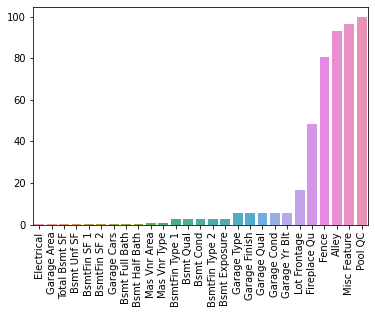

In [28]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.show() # nustatėm kur kiek trūksta. Toliau reik nuspręsti ką daryt su šiais trūkumais

In [29]:
#pirma pažiūrim ką daryt su tais stulpeliais, kur duomenų trūksta labai mažai, mažiau negu 1%
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [33]:
# hmm... dauguma turi 0.034165%, kiek tai yra iš tikrųjų ?
0.034165 * len(df) / 100 # atitinka tik 1 eilutė t.y. trūksta 1 eilutės, bet neaišku ar ta pati, ar skirtingos
# 0.068329 yra dvigubai daugiau negu 0.034165, tai ten 2 eilučių trūksta

1.0000095500000001

In [34]:
df[df['Electrical'].isnull()] # pažiūrim ar ta pati eilutė kaip "Garage Area"? ne

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [35]:
# kai mažiau negu 1% trūksta, tai tsg išmetam, nieko baisaus, nors reiktų stengtis palikt kuo daugiau info
df = df.dropna(axis=0,subset=['Electrical', 'Garage Area'])
percent_nan = percent_missing(df)
percent_nan[percent_nan < 1] # išėmėm ir iš kitų stulpelių, kas yra gerai

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

In [ ]:
# liko stulpelių kurie prasideda Bsmt, jeigu pažiūrėsim į description tai jie susiję su namo basement info
# tie namai neturi basement todėl su Bsmt susijusiais stulpeliais neturi info.
# Tai reik susirast visus tuos stulpelius ir jų eilutes pakeisti kita info
# logiška ir tinka - jų netrint, o palikt (nors galėjom ir trint, jų lb mažai)

# skaitines basment info uždėt 0
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

# kategorinius pažymėt 'None' 
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [37]:
percent_nan = percent_missing(df)
percent_nan[percent_nan < 1] # liko tik kelis stulpeliai kur na mažiau už 1%

Mas Vnr Type    0.786325
Mas Vnr Area    0.786325
dtype: float64

In [ ]:
#likę 2 stulpeliai susiję su masonary, paskaičius desc. galim juos palikt pažymėjus None ir 0
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

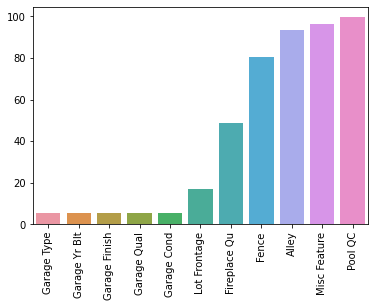

In [39]:
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.show() # Toliau reik nuspręsti ką daryt su stulpelias kur trūksta daugiau negu 1%

In [ ]:
# 5 stulpeliai susijė su garažu, trūksta info, nes namas neturi garažo, galim vėl tsg pakeist NA į 'None'
# tai žinom iš desc. failo
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)# čia padarėm, kad pastatytas 0 metais, kas yra whatever
# namas neturi garažo, tai jis nebuvo pastatytas jokiais metais, tai galim pažymėt nuliniais 
# nors tai nėra logiška, bet suprantama.

In [42]:
percent_nan = percent_missing(df)
percent_nan # dabar jau liko tie stulpeliai kur trūksta daug eilučių. Lengviausia būtų tsg išmest tuos columns

Lot Frontage    16.752137
Fireplace Qu    48.547009
Fence           80.478632
Alley           93.230769
Misc Feature    96.410256
Pool QC         99.589744
dtype: float64

In [43]:
# geriau būtų fillna ir pagal desc. logiška vėl fillint 0 arba 'None', bet educational reasons ir lengivau taip
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

percent_nan = percent_missing(df)
percent_nan # liko du stulpeliai kur nei mažai, nei daug trūksta, o vidutiniškai. Reik gilintis į desc.txt

Lot Frontage    16.752137
Fireplace Qu    48.547009
dtype: float64

In [44]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None") # kadangi kategorinis tai galim fillint "None"
# Lot Frontage yra skaitinis, tai reik pagal aprašymą nuspręst kaip fillint.

We will operate under the assumption that the Lot Frontage is related to what neighborhood a house is in.

iš desc.txt:
* Neighborhood: Physical locations within Ames city limits
* LotFrontage: Linear feet of street connected to property

Taigi, sugurupuokim pagal Neighborhood (rajoną), ir tam rajonui paskaičiuokim vidutinę LotFrontage reikšmę, kurią fillinsim ten kur missing (NA).

In [45]:
df.groupby('Neighborhood')['Lot Frontage'].mean() # kuriems rajonams neišeina paskaičiuot Lot Frontage vidurkio
# galbūt dėl vietovės neįmanoma.

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [46]:
# vietoj agregacijos kai groupby darom, galim agreguodami transformuoti tas reikšmes
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))
# čia tas pats kaip df['Lot Frontage']
# bet eilutėse kur buvo buvo NA, užpildė agregacijos vidurkiu 

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2925     37.000000
2926     75.144444
2927     62.000000
2928     77.000000
2929     74.000000
Name: Lot Frontage, Length: 2925, dtype: float64

In [ ]:
# einam per visas eilutes ir žiūrim, jei eilutė neturi 'Lot Frontage', 
# fillinam su tos eilutės rajono 'Lot Frontage' vidurkiu 
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [48]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [49]:
# liko 3 eilutės kur rajonui negalėjo paskaičiuoti vidutinės reikšmės
# tai duodam tsg 0 ir viskas
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)
percent_nan = percent_missing(df)
percent_nan
# df.to_csv("Ames_NO_Missing_Data.csv",index=False)

Series([], dtype: float64)

# Dirbam su trūkstamom kategorinėm reikšmėm

Gali būt kategorinių stulpelių kurie pažymėti skaičiais, bet jeigu tos kategorjos nėra rikiuojamos (ordinal)
tai skaičiais jas žymėti nėra gerai. Modelis gali interpretuoti, kad vienos kategorijos geriau už kitas
nors taip nėra. Reikia pasirūpinti, kad taip nebūtų duomenų aibėje. Ką galime padaryti dėl to ?
Galime sukurti dummmy variables t.y. kategorijas paversti į stulpelius ir reikšmėse tsg žymėti 1-yra,0-nėra. Tai vadinama One-hot encoding. Jeigu labai daug gausis stulpelių, tai galima iš pdradžių stransformuotį į higher order kategorijas t.y. susiaurinti, pvz: salys -> žemynai.


Pažiūrėjus į desc.txt yra tokių stulpelių pvz. MSSubClass.

In [52]:
# konveruoti skaičiaus kategorijas į tekstines kategorijas (int į string) kad būtų galima kviesti dummies funciją
df['MS SubClass'] = df['MS SubClass'].apply(str)

# galima ir exclude, taip padalint duomenų aibę į kategorines ir skaitines aibes
df_categorical = df.select_dtypes(include='object') # išfiltuorja df, kad liktų tik tekstinių reikšmių stulpeliai
df_categorical

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2926,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2927,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2928,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [50]:
# visiems string'iniams stulpeliams sukursim dummies
# jeigu jie nebus reikalingi tai po to tsg per Lasso gaus 0 koeficientą, 
# t.y. reguliarizacija padės atsirinkti reikalingus stulpelius
# kiekvienam stulpeliui vieną reikšmę (transformuotą kategorijos stulpelį)
# galim išmesti (drop_first) nes sukuriant dummies gaunasi perteklinė informacija 
# žinom, kad jei visuose kituose yra 0, tai jam by default 1.
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2926,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2928,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [51]:
df_numeric = df.select_dtypes(exclude='object') # pasiemam skaitinius stulpelius
# sujungiam skaitinius su dummies, taip pakeisdami textinius stulpelius į dummies stulpelius
final_df = pd.concat([df_numeric, df_dummies], axis=1) 
final_df.head() # dabar turim dar daugiau stulpelių negu turėjom.
# duomenis paruošti ML-modeliui, nes visi stulpeliai arba floats arba integers.

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
